### Heroes Of Pymoli Data Analysis

-----

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File to Load (Remember to Change These)
file_to_load = "purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)
purchase_data_df= pd.DataFrame(purchase_data)
purchase_data_df

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44
...,...,...,...,...,...,...,...
775,775,Aethedru70,21,Female,60,Wolf,3.54
776,776,Iral74,21,Male,164,Exiled Doomblade,1.63
777,777,Yathecal72,20,Male,67,"Celeste, Incarnation of the Corrupted",3.46
778,778,Sisur91,7,Male,101,Final Critic,4.19


## Player Count

* Display the total number of players


In [6]:
total_players = purchase_data_df['SN'].nunique()
total_players

576

## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [7]:
#number of unique items
number_of_uni = purchase_data_df['Item Name'].nunique()

#average price
avg_price= purchase_data_df['Price'].mean()
avg_price= ("{:,.2f}$".format)(avg_price)

#number of purchases
number_of_purch= purchase_data_df['Purchase ID'].count()

#total revenue
total_rev= purchase_data_df['Price'].sum()
total_rev= ("{:,.2f}$".format)(total_rev)

In [8]:
purchasing_analysis= [{'Number of Unique Items': int(number_of_uni),
                      'Average Price': avg_price,
                      'Number of Purchases': number_of_purch,
                      'Total revenue': total_rev}]
purchasing_analysis=pd.DataFrame(purchasing_analysis)
purchasing_analysis

,Number of Unique Items,Average Price,Number of Purchases,Total revenue
0,179,3.05$,780,"2,379.77$"


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [9]:
#count
count_by_gender= purchase_data_df.groupby("Gender")["SN"].nunique()

#percentage
percentage= count_by_gender/total_players*100
percentage= percentage.map("{:,.2f}%".format)



In [10]:
gender_demo= {'Total count':count_by_gender,
             "Percentage of players":percentage}
gender_demo= pd.DataFrame(gender_demo)
gender_demo

,Total count,Percentage of players
Gender,,
Female,81,14.06%
Male,484,84.03%
Other / Non-Disclosed,11,1.91%



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [11]:
#purchase count by gender
purch_count= purchase_data_df['Gender'].value_counts()

#average purchase price
price_by_gender= purchase_data_df.groupby("Gender")['Price'].mean()
price_by_gender= (price_by_gender).map("{:,.2f}$".format)

#total purchase value
purchasevalue_by_gender= purchase_data_df.groupby("Gender")['Price'].sum()
purchasevalue_by_gender= (purchasevalue_by_gender).map("{:,.2f}$".format)


#average total purchase per person
avg_total_purch_pp= purchase_data_df.groupby(['Gender'])['Price'].sum()/purchase_data_df.groupby(['Gender'])['SN'].nunique()

purchasing_analysis_by_gender= {"Purchase Count": purch_count,
                                'Average Purchase Price': price_by_gender,
                                'Total Purchase Value': purchasevalue_by_gender,
                                'Avg Total Purchase Per Person': avg_total_purch_pp}
purchasing_analysis_by_gender= pd.DataFrame(purchasing_analysis_by_gender).round(2)
purchasing_analysis_by_gender


,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase Per Person
Female,113,3.20$,361.94$,4.47
Male,652,3.02$,"1,967.64$",4.07
Other / Non-Disclosed,15,3.35$,50.19$,4.56


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [12]:
df_with_unique_screennames = purchase_data_df.drop_duplicates(subset=['SN'])
#establish bins
age_bins= [0, 9, 14, 19, 24, 29, 34, 39, float("inf")]
age_groups = ['<10','10-14','15-19','20-24','25-29','30-34','35-39','40+']
age_range= pd.cut(df_with_unique_screennames["Age"], bins= age_bins, labels= age_groups)
#calculate numbers
age_range1 = age_range.value_counts()
age_range1 = age_range1.sort_index()

#calculate percentage
percentage_by_age= age_range.value_counts(normalize= True, ascending= True)*100
percentage_by_age= (percentage_by_age).map("{:,.2f}%".format)

age_demographics= {'Total Count': age_range1,
                    'Percentage of players': percentage_by_age}
age_demographics= pd.DataFrame(age_demographics).round(2)
age_demographics



,Total Count,Percentage of players
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [13]:
#purchase count
age_bins= [0, 9, 14, 19, 24, 29, 34, 39]
age_groups = ['<10','10-14','15-19','20-24','25-29','30-34','35-39']

purch_count_by_age = pd.cut(purchase_data_df["Age"], bins= age_bins, labels= age_groups).value_counts().sort_index()
purch_count_by_age = purch_count_by_age.drop(labels=['20-24','30-34'])


#avg. purchase price
avg_purchase_price= purchase_data_df.groupby(pd.cut(purchase_data_df['Age'], bins=age_bins, labels= age_groups))['Price'].mean()
avg_purchase_price= avg_purchase_price.drop(labels=['20-24','30-34'])
avg_purchase_price= (avg_purchase_price).map("{:,.2f}$".format)

#total purchase value
purchasevalue_by_age= purchase_data_df.groupby(pd.cut(purchase_data_df['Age'], bins=age_bins, labels= age_groups))['Price'].sum()
purchasevalue_by_age= purchasevalue_by_age.drop(labels=['20-24','30-34'])
purchasevalue_by_age= (purchasevalue_by_age).map("{:,.2f}$".format)


#average total purchase per person
avg_total_purch_pp_age=purchase_data_df.groupby(pd.cut(purchase_data_df['Age'], bins=age_bins, labels= age_groups))["Price"].sum()/purchase_data_df.groupby(pd.cut(purchase_data_df['Age'], bins=age_bins, labels= age_groups))["Price"].nunique()
avg_total_purch_pp_age= avg_total_purch_pp_age.drop(labels=['20-24','30-34'])
avg_total_purch_pp_age= avg_total_purch_pp_age.round(2)

purchasing_analysis_by_age= {'Purchase Count': purch_count_by_age,
                            'Average Purchase Price': avg_purchase_price,
                            'Total Purchase Value': purchasevalue_by_age,
                            'Average Total Purchase Per Person': avg_total_purch_pp_age}
purchasing_analysis_by_age= pd.DataFrame(purchasing_analysis_by_age)
purchasing_analysis_by_age



,Purchase Count,Average Purchase Price,Total Purchase Value,Average Total Purchase Per Person
<10,23,3.35$,77.13$,3.67
10-14,28,2.96$,82.78$,3.45
15-19,136,3.04$,412.89$,4.97
25-29,101,2.90$,293.00$,4.01
35-39,41,3.60$,147.67$,4.34


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [14]:
#first column
SN_top_spend=purchase_data_df[purchase_data_df["SN"] == "Lisosia93"]
SN_top_spend

#purchase count

individual_purch_count= purchase_data_df["SN"].value_counts()
individual_purch_count= individual_purch_count[0]

#average purchase price
individial_purch_price= SN_top_spend["Price"].mean()
individial_purch_price= ("{:,.2f}$".format)(individial_purch_price)

#total purchase value
individual_purch_val= SN_top_spend['Price'].sum()
individual_purch_val= ("{:,.2f}$".format)(individual_purch_val)

top_spenders= {'SN': 'Lisosia93',
                'Purchase Count': individual_purch_count,
                "Average Purchase Price": individial_purch_price,
                'Total Purchase Value': individual_purch_val}
top_spenders= pd.DataFrame(top_spenders, index= ['Lisosia93'])
top_spenders

,SN,Purchase Count,Average Purchase Price,Total Purchase Value
Lisosia93,Lisosia93,5,3.79$,18.96$


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [15]:
most_popular_df= purchase_data_df.loc[:, 'Item ID':'Price']

#purchase count
purch_count_ts=  purchase_data_df[['Item Name', 'Item ID', 'Price', 'Purchase ID']].groupby(by=['Item Name', 'Item ID', 'Price']).count().sort_values(by='Purchase ID', ascending=False).rename(columns= {"Purchase ID":"Purchase Count"}).head()
print(purch_count_ts)








#total purchase value
#total_purch_val= purch_count_ts*item_price
#total_purch_val

                                                            Purchase Count
Item Name                                    Item ID Price                
Oathbreaker, Last Hope of the Breaking Storm 178     4.23               12
Extraction, Quickblade Of Trembling Hands    108     3.53                9
Nirvana                                      82      4.90                9
Fiery Glass Crusader                         145     4.58                9
Pursuit, Cudgel of Necromancy                19      1.02                8


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



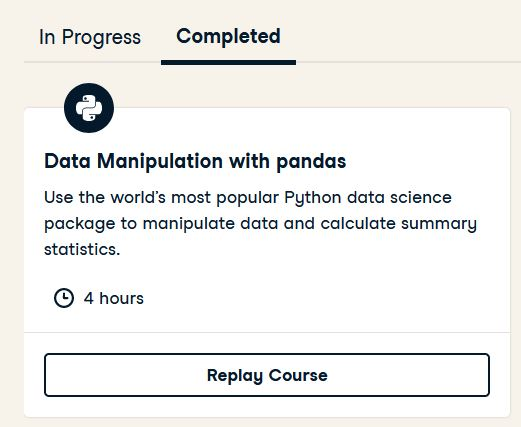

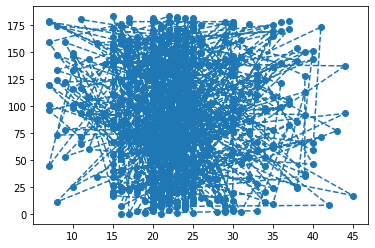

In [24]:
fig, ax= plt.subplots()
ax.plot(df_with_unique_screennames["Age"],df_with_unique_screennames["Item ID"], marker= 'o', linestyle= '--')
plt.show()

#it shows most video games are bought by people in the range of 15-30